#  Visualização

**Compondo gráficos, passo a passo**

In [1]:
import os
import pandas as pd
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trans_df = pd.read_pickle(os.path.join('temp', 'df_eda.pkl'))

In [3]:
cust_df = pd.read_pickle(os.path.join('temp', 'customer_eda.pkl'))

In [4]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22703 entries, 0 to 23052
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    22703 non-null  int64         
 1   cust_id           22703 non-null  int64         
 2   tran_date         22703 non-null  object        
 3   prod_subcat_code  22703 non-null  int64         
 4   prod_cat_code     22703 non-null  int64         
 5   Qty               22703 non-null  int64         
 6   Rate              22703 non-null  int64         
 7   Tax               22703 non-null  float64       
 8   total_amt         22703 non-null  float64       
 9   Store_type        22703 non-null  object        
 10  prod_cat          22703 non-null  object        
 11  prod_subcat       22703 non-null  object        
 12  year              22703 non-null  int64         
 13  tran_date_dt      22703 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float

In [5]:
trans_df.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,year,tran_date_dt
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,2014,2014-02-28
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,Clothing,Women,2014,2014-02-20
2,73713102191,268867,15-02-2014,1,1,1,714,74.970,788.970,MBR,Clothing,Women,2014,2014-02-15
3,57134739558,270625,14-02-2014,1,1,5,595,312.375,3287.375,TeleShop,Clothing,Women,2014,2014-02-14
4,79536458466,271944,12/2/2014,1,1,2,996,209.160,2201.160,e-Shop,Clothing,Women,2014,2014-02-12


In [6]:
cust_df.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,1970-01-02,M,4.0
1,269696,1970-01-07,F,8.0


Juntar informação de transações e cliente (recalcular idade à data da compra - **porquê**?)

In [7]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_Id  5647 non-null   int64         
 1   DOB          5647 non-null   datetime64[ns]
 2   Gender       5645 non-null   object        
 3   city_code    5647 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 176.6+ KB


In [8]:
trans_df.shape

(22703, 14)

In [12]:
df = pd.merge(trans_df, cust_df,
              left_on=['cust_id'],
              right_on=['customer_Id'],
              how='left').drop(['customer_Id', 'tran_date'], axis=1)

In [13]:
df.shape

(22703, 16)

In [14]:
df.head()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,year,tran_date_dt,DOB,Gender,city_code
0,80712190438,270351,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,2014,2014-02-28,1981-09-26,M,5.0
1,80712190438,270351,1,1,5,772,405.300,4265.300,e-Shop,Clothing,Women,2014,2014-02-20,1981-09-26,M,5.0
2,73713102191,268867,1,1,1,714,74.970,788.970,MBR,Clothing,Women,2014,2014-02-15,1987-10-24,F,4.0
3,57134739558,270625,1,1,5,595,312.375,3287.375,TeleShop,Clothing,Women,2014,2014-02-14,1992-02-03,M,6.0
4,79536458466,271944,1,1,2,996,209.160,2201.160,e-Shop,Clothing,Women,2014,2014-02-12,1971-12-11,F,5.0


---

In [19]:
relativedelta(pd.to_datetime('2014-02-28'), pd.to_datetime('1981-09-26')).years

32

In [21]:
relativedelta(df['tran_date_dt'], df['DOB'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [23]:
l = []
for i in range(3):
    l.append(i*2)
l

[0, 2, 4]

In [24]:
[i*2 for i in range(3)]

[0, 2, 4]

In [25]:
for i, row in df.head(3).iterrows():
    print(relativedelta(row['tran_date_dt'], row['DOB']).years)

32
32
26


In [27]:
l = []
for i, row in df.iterrows():
    l.append(relativedelta(row['tran_date_dt'], row['DOB']).years)
l

[32,
 32,
 26,
 22,
 42,
 23,
 30,
 23,
 23,
 23,
 29,
 34,
 35,
 23,
 23,
 40,
 25,
 33,
 40,
 41,
 29,
 23,
 36,
 22,
 38,
 27,
 25,
 23,
 26,
 28,
 27,
 28,
 21,
 38,
 25,
 42,
 34,
 38,
 37,
 21,
 35,
 34,
 28,
 33,
 30,
 25,
 32,
 34,
 38,
 35,
 43,
 22,
 22,
 36,
 36,
 21,
 33,
 42,
 33,
 37,
 22,
 42,
 43,
 32,
 34,
 38,
 43,
 36,
 43,
 34,
 28,
 24,
 43,
 32,
 38,
 22,
 38,
 33,
 38,
 26,
 39,
 41,
 32,
 39,
 43,
 36,
 23,
 30,
 40,
 31,
 41,
 36,
 24,
 32,
 31,
 24,
 39,
 43,
 43,
 26,
 21,
 31,
 41,
 24,
 24,
 29,
 36,
 24,
 26,
 37,
 24,
 26,
 36,
 32,
 27,
 22,
 41,
 40,
 42,
 30,
 27,
 24,
 31,
 42,
 36,
 25,
 28,
 24,
 38,
 43,
 39,
 21,
 34,
 35,
 36,
 43,
 40,
 26,
 26,
 21,
 40,
 34,
 25,
 23,
 34,
 27,
 27,
 21,
 41,
 33,
 31,
 36,
 30,
 25,
 33,
 41,
 41,
 25,
 31,
 40,
 25,
 23,
 40,
 26,
 24,
 28,
 43,
 27,
 32,
 35,
 41,
 40,
 32,
 28,
 23,
 32,
 24,
 40,
 41,
 24,
 33,
 26,
 30,
 36,
 26,
 37,
 42,
 29,
 37,
 30,
 24,
 43,
 25,
 40,
 36,
 22,
 32,
 34,
 29,
 33,


In [28]:
df['age'] = [relativedelta(row['tran_date_dt'], row['DOB']).years for i, row in df.iterrows()]

In [29]:
df.head()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,year,tran_date_dt,DOB,Gender,city_code,age
0,80712190438,270351,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,2014,2014-02-28,1981-09-26,M,5.0,32
1,80712190438,270351,1,1,5,772,405.300,4265.300,e-Shop,Clothing,Women,2014,2014-02-20,1981-09-26,M,5.0,32
2,73713102191,268867,1,1,1,714,74.970,788.970,MBR,Clothing,Women,2014,2014-02-15,1987-10-24,F,4.0,26
3,57134739558,270625,1,1,5,595,312.375,3287.375,TeleShop,Clothing,Women,2014,2014-02-14,1992-02-03,M,6.0,22
4,79536458466,271944,1,1,2,996,209.160,2201.160,e-Shop,Clothing,Women,2014,2014-02-12,1971-12-11,F,5.0,42


---

In [30]:
tmp = df.head().copy()

In [34]:
i=0
for tr, dob in zip(tmp['tran_date_dt'], tmp['DOB']):
    i+=1
    print(i)
    print(relativedelta(tr, dob).years)

1
32
2
32
3
26
4
22
5
42


---

## Visualização - variáveis categóricas

Número de transações por Categoria de produto:

In [39]:
df['prod_cat'].value_counts().sort_values()

prod_cat
Bags                1959
Clothing            2918
Footwear            2946
Home and kitchen    4062
Electronics         4839
Books               5979
Name: count, dtype: int64

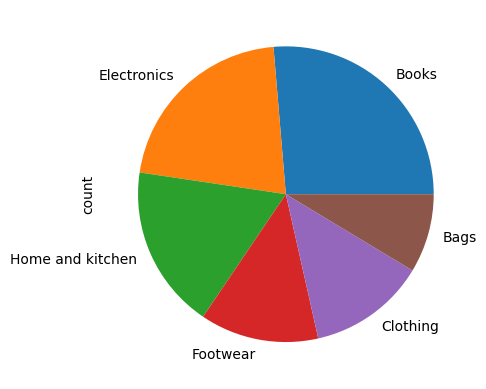

In [36]:
df['prod_cat'].value_counts().plot.pie()
plt.show()

Podemos fazer melhor?

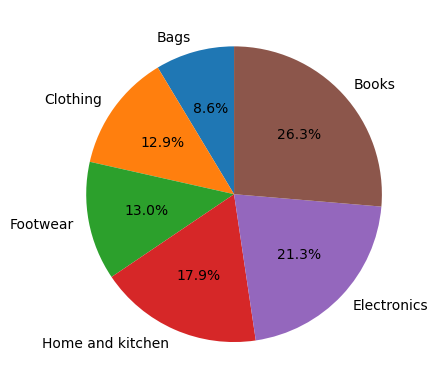

In [37]:
df['prod_cat'].value_counts().sort_values().plot.pie(autopct='%.1f%%', startangle=90)
plt.ylabel(None)
plt.show()

Opções:
- Colocar título, melhorar cores, cor, colocação e tamanho dos textos...
- Fazer [ainda] melhor :)

http://python-graph-gallery.com/pie-plot/

https://en.wikipedia.org/wiki/Pie_chart#/media/File:Piecharts.svg

<Axes: xlabel='count', ylabel='prod_cat'>

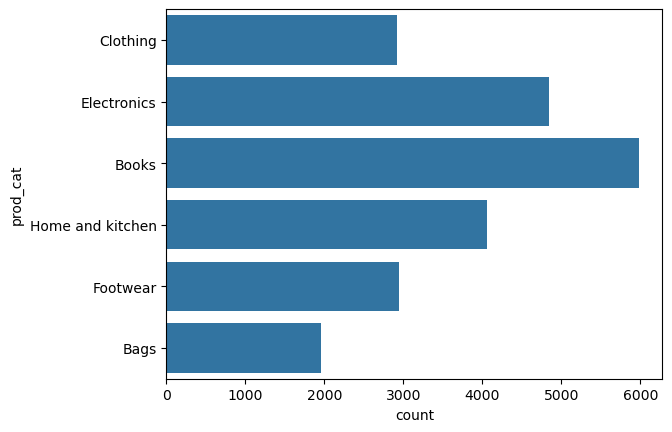

In [43]:
sns.countplot(data=df, y='prod_cat')

In [41]:
tmp = df['prod_cat'].value_counts()
tmp#.index

prod_cat
Books               5979
Electronics         4839
Home and kitchen    4062
Footwear            2946
Clothing            2918
Bags                1959
Name: count, dtype: int64

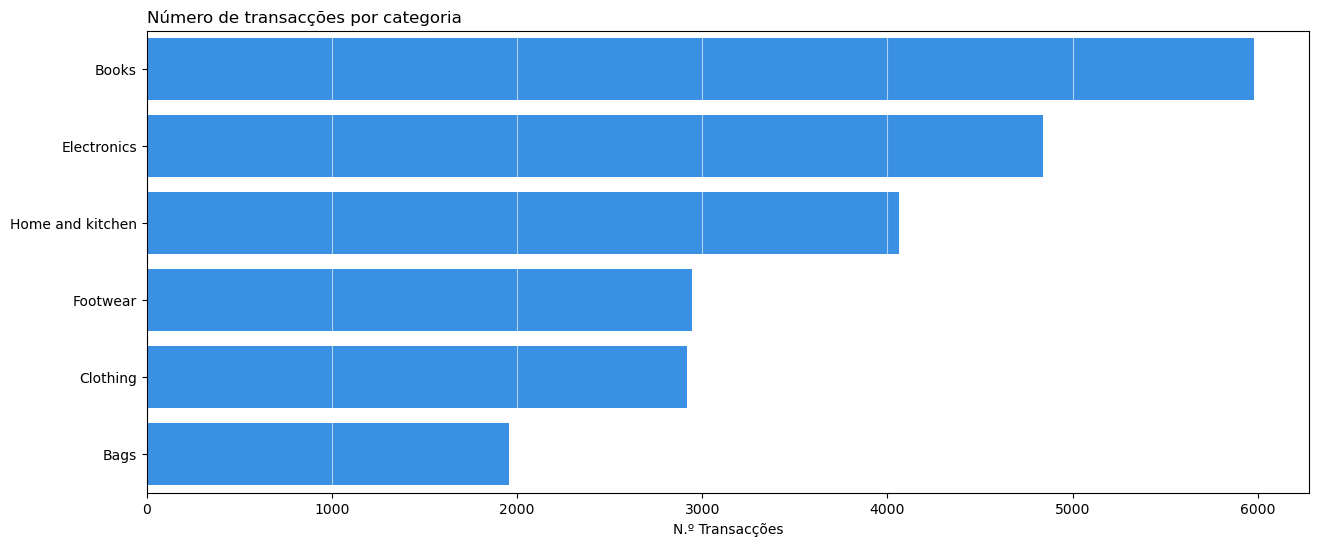

In [42]:
plt.figure(figsize=(15, 6))
sns.barplot(x=tmp, y=tmp.index, color='dodgerblue')
plt.grid(axis='x', color='w', alpha=0.6)
plt.title('Número de transacções por categoria', loc='left')
plt.xlabel('N.º Transacções')
plt.ylabel(None)
plt.show()

---

In [44]:
df["tran_date_dt"].describe()

count                            22703
mean     2012-08-09 01:27:12.788618240
min                2011-01-25 00:00:00
25%                2011-11-02 00:00:00
50%                2012-08-11 00:00:00
75%                2013-05-17 00:00:00
max                2014-02-28 00:00:00
Name: tran_date_dt, dtype: object

Quantidade de artigos devolvidos por mês

In [45]:
df.head()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,year,tran_date_dt,DOB,Gender,city_code,age
0,80712190438,270351,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,2014,2014-02-28,1981-09-26,M,5.0,32
1,80712190438,270351,1,1,5,772,405.300,4265.300,e-Shop,Clothing,Women,2014,2014-02-20,1981-09-26,M,5.0,32
2,73713102191,268867,1,1,1,714,74.970,788.970,MBR,Clothing,Women,2014,2014-02-15,1987-10-24,F,4.0,26
3,57134739558,270625,1,1,5,595,312.375,3287.375,TeleShop,Clothing,Women,2014,2014-02-14,1992-02-03,M,6.0,22
4,79536458466,271944,1,1,2,996,209.160,2201.160,e-Shop,Clothing,Women,2014,2014-02-12,1971-12-11,F,5.0,42


https://matplotlib.org/stable/users/explain/text/annotations.html

In [57]:
# df[df['Qty']<0].groupby(pd.Grouper(key='tran_date_dt', freq='1M'))['Qty'].sum()*-1

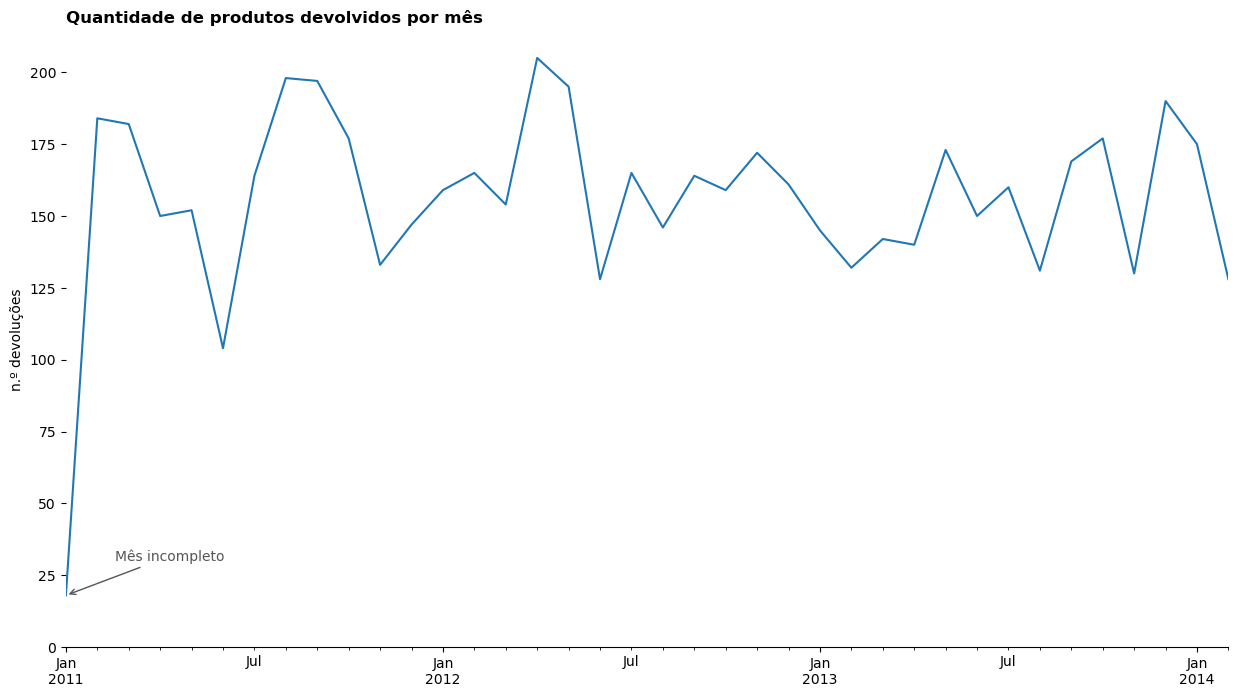

In [75]:
tmp = (df[df['Qty']<0].groupby(pd.Grouper(key='tran_date_dt', freq='1M'))['Qty'].sum()*-1)

plt.figure(figsize=(15, 8))
tmp.plot()
plt.title('Quantidade de produtos devolvidos por mês', loc='left', fontdict=dict(fontweight='bold'))
sns.despine(left=True)
# plt.tick_params(axis='x', which='minor', bottom=False)
plt.annotate("Mês incompleto",
             xy=(tmp.idxmin(), tmp.min()), # ponto a destacar
             # xy=(pd.to_datetime('2011-01-31'), 18), # ponto a destacar
             # xy=(0.5, 0.5), # ponto a destacar
             # xycoords='axes fraction',
             # xycoords='data', # porque o xy se refere aos dados
             xytext=(35, 25), # posição do texto
             textcoords='offset points', # a partir no ponto destacado
             arrowprops=dict(color='#555555', arrowstyle='->'),
             color='#555555'
            )
plt.xlabel('')
plt.ylabel('n.º devoluções')
plt.ylim(0)
# plt.savefig('prod_dev_mes.png')
plt.show()

In [ ]:
tmp.idxmin(), tmp.min()

In [94]:
tmp = df['prod_cat'].value_counts()# normalize=True,

In [89]:
tmp

prod_cat
Books               0.263357
Electronics         0.213144
Home and kitchen    0.178919
Footwear            0.129763
Clothing            0.128529
Bags                0.086288
Name: proportion, dtype: float64

In [84]:
for i in tmp.items():
    print(i)

('Books', 5979)
('Electronics', 4839)
('Home and kitchen', 4062)
('Footwear', 2946)
('Clothing', 2918)
('Bags', 1959)


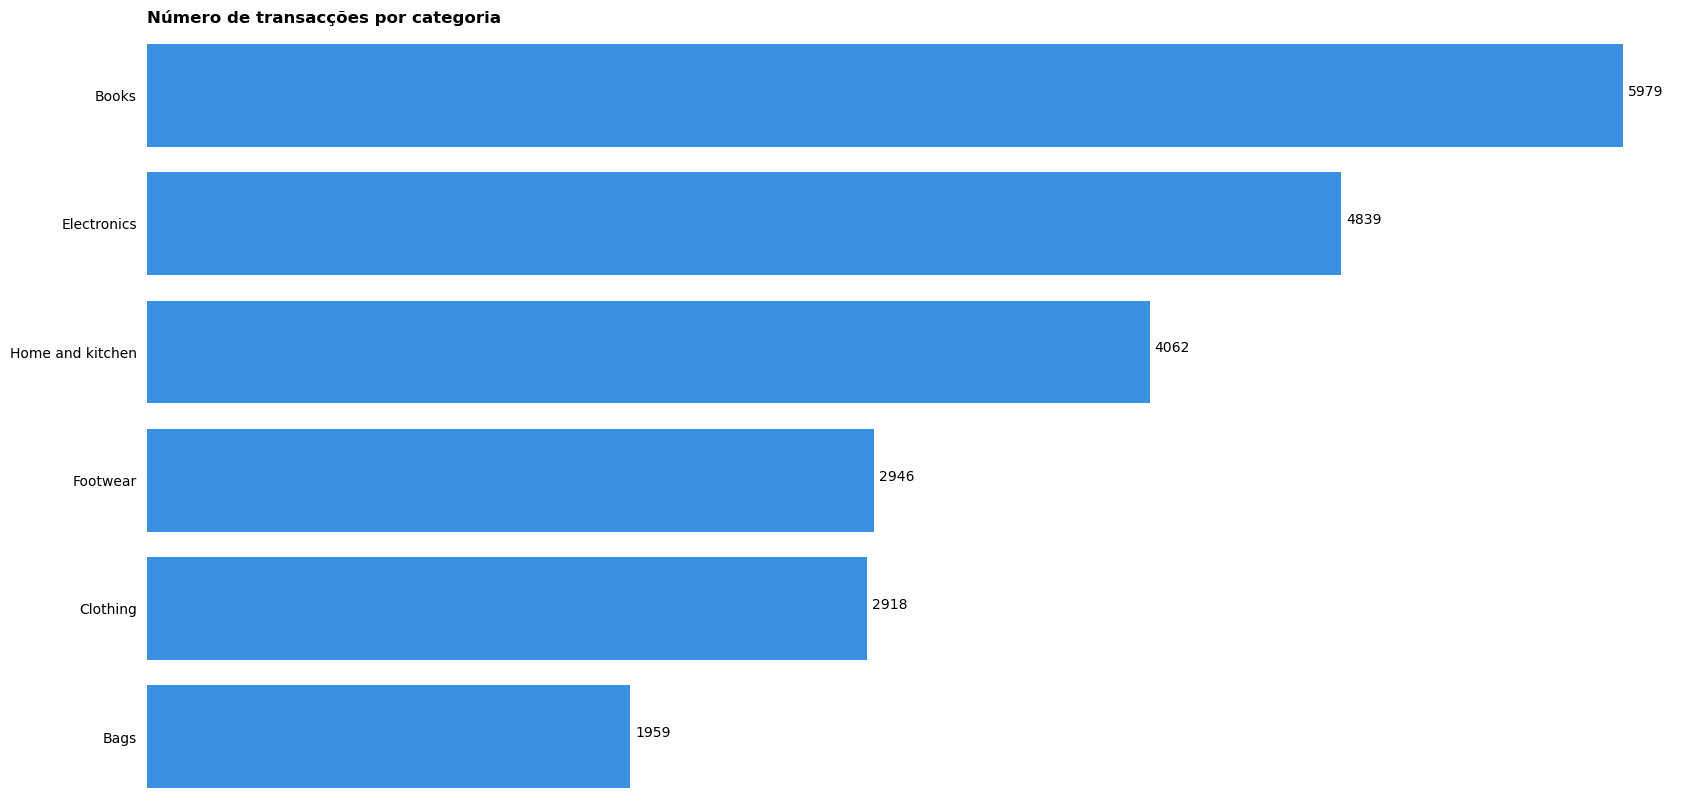

In [95]:
fig = plt.figure(figsize=(20, 10)) 
sns.barplot(x=tmp, y=tmp.index, color='dodgerblue')
# labels - não vi melhor forma de fazer esta parte - adicionar para cada categoria num loop
# plt.text(5979, 'Books', '5979', ha="right")
for i, v in tmp.items():
    plt.text(v+20, i, v, color='black', ha="left")
    # plt.text(v, i, f'{v:.1%} ', color='white', ha="right")
plt.title('Número de transacções por categoria', loc='left', fontdict=dict(fontweight='bold'))
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis='both', which='major', left=False, bottom=False, labelbottom=False)
sns.despine(left=True, bottom=True)
plt.show()

---